<a href="https://colab.research.google.com/github/LeonardoRamirezz/Python_Data_Cleaning/blob/main/Python_csv_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Profiling

## Import data and quick overview

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

### FactSales

In [ ]:
FactSales = pd.read_csv('FactSales.csv')
FactSales.head()

,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount,UnitPrice,SalesReasonReasonType
0,375,20230101,15114,SO46701,2181.5625,2181.5625,NaN
1,377,20230101,21200,SO46708,2181.5625,2181.5625,NaN
2,369,20230101,15116,SO46702,2443.3500,2443.3500,Promotion
3,370,20230101,13059,SO46704,2443.3500,2443.3500,Promotion
4,381,20230101,16942,SO46700,1000.4375,1000.4375,NaN


In [ ]:
FactSales.shape

(184855, 7)

In [ ]:
FactSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184855 entries, 0 to 184854
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ProductKey             184855 non-null  int64  
 1   OrderDateKey           184855 non-null  int64  
 2   CustomerKey            184855 non-null  int64  
 3   SalesOrderNumber       184855 non-null  object 
 4   SalesAmount            184855 non-null  float64
 5   UnitPrice              184855 non-null  float64
 6   SalesReasonReasonType  179131 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 9.9+ MB


In [ ]:
FactSales.describe()

,ProductKey,OrderDateKey,CustomerKey,SalesAmount,UnitPrice
count,184855.000000,1.848550e+05,184855.000000,184855.000000,184855.000000
mean,447.364405,2.024052e+07,18847.749052,315.285369,315.285369
std,117.420237,1.474118e+03,5375.363140,695.300428,695.300428
min,214.000000,2.023010e+07,11000.000000,2.290000,2.290000
25%,381.000000,2.024042e+07,14049.000000,4.990000,4.990000
50%,480.000000,2.024072e+07,18173.000000,24.490000,24.490000
75%,529.000000,2.024102e+07,23371.000000,53.990000,53.990000
max,606.000000,2.024123e+07,29483.000000,2443.350000,2443.350000


Maybe we should change the columns that contain ID to object type because they are categorical variables but for now it's not neccessary.<br>
Data in SalesAmount and UnitPrice is widely spread, which is common for sales data.

### DimProduct

In [ ]:
DimProduct = pd.read_csv('DimProduct.csv')
DimProduct.head()

,ProductKey,ItemCode,ProductModelName,ProductName,Category,Subcategory
0,1,AR-5381,NaN,Adjustable Race,NaN,NaN
1,2,BA-8327,NaN,Bearing Ball,NaN,NaN
2,3,BE-2349,NaN,BB Ball Bearing,NaN,NaN
3,4,BE-2908,NaN,Headset Ball Bearings,NaN,NaN
4,5,BL-2036,NaN,Blade,NaN,NaN


In [ ]:
DimProduct.shape

(606, 6)

In [ ]:
DimProduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductKey        606 non-null    int64 
 1   ItemCode          606 non-null    object
 2   ProductModelName  397 non-null    object
 3   ProductName       606 non-null    object
 4   Category          397 non-null    object
 5   Subcategory       397 non-null    object
dtypes: int64(1), object(5)
memory usage: 28.5+ KB


Some null values in ProductModelName, Category and Subcategory.
We'll check those later

### DimCustomer

In [ ]:
DimCustomer = pd.read_csv('DimCustomer.csv')
DimCustomer.head()

,CustomerKey,GeographyKey,CustomerCity,CustomerCountry,FullName,BirthDate,MaritalStatus,Contact,Gender,YearlyIncome,TotalChildren,EnglishEducation
0,11000,26,Rockhampton,Australia,Jon Yang,10/6/1971,Married,jon24@adventure-works.com,Male,90000,2,Bachelors
1,11001,37,Seaford,Australia,Eugene Huang,5/10/1976,Single,eugene10@adventure-works.com,Male,60000,3,Bachelors
2,11002,31,Hobart,Australia,Ruben Torres,2/9/1971,Married,ruben35@adventure-works.com,Male,60000,3,Bachelors
3,11003,11,North Ryde,Australia,Christy Zhu,8/14/1973,Single,christy12@adventure-works.com,Female,70000,0,Bachelors
4,11004,19,Wollongong,Australia,Elizabeth Johnson,8/5/1979,Single,elizabeth5@adventure-works.com,Female,80000,5,Bachelors


In [ ]:
DimCustomer.shape

(18484, 12)

In [ ]:
DimCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerKey       18484 non-null  int64 
 1   GeographyKey      18484 non-null  int64 
 2   CustomerCity      18484 non-null  object
 3   CustomerCountry   18484 non-null  object
 4   FullName          18484 non-null  object
 5   BirthDate         18484 non-null  object
 6   MaritalStatus     18484 non-null  object
 7   Contact           18484 non-null  object
 8   Gender            18484 non-null  object
 9   YearlyIncome      18484 non-null  int64 
 10  TotalChildren     18484 non-null  int64 
 11  EnglishEducation  18484 non-null  object
dtypes: int64(4), object(8)
memory usage: 1.7+ MB


In [ ]:
DimCustomer.describe()

,CustomerKey,GeographyKey,YearlyIncome,TotalChildren
count,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,257.956287,57305.777970,1.844352
std,5336.015523,196.531062,32285.841703,1.612408
min,11000.000000,2.000000,10000.000000,0.000000
25%,15620.750000,62.000000,30000.000000,0.000000
50%,20241.500000,240.000000,60000.000000,2.000000
75%,24862.250000,345.000000,70000.000000,3.000000
max,29483.000000,654.000000,170000.000000,5.000000


Nothing special here, values seem normal.

### DimDate

In [ ]:
DimDate = pd.read_csv('DimDate.csv')
DimDate.head()

,DateKey,Date,WeekNum,Day,Month,MonthShort,MonthNo,Quarter,Year
0,20230101,1/1/2023,1,Sunday,January,Jan,1,1,2023
1,20230102,1/2/2023,1,Monday,January,Jan,1,1,2023
2,20230103,1/3/2023,1,Tuesday,January,Jan,1,1,2023
3,20230104,1/4/2023,1,Wednesday,January,Jan,1,1,2023
4,20230105,1/5/2023,1,Thursday,January,Jan,1,1,2023


In [ ]:
DimDate.shape

(731, 9)

In [ ]:
DimDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DateKey     731 non-null    int64 
 1   Date        731 non-null    object
 2   WeekNum     731 non-null    int64 
 3   Day         731 non-null    object
 4   Month       731 non-null    object
 5   MonthShort  731 non-null    object
 6   MonthNo     731 non-null    int64 
 7   Quarter     731 non-null    int64 
 8   Year        731 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 51.5+ KB


In [ ]:
DimDate.describe()

,DateKey,WeekNum,MonthNo,Quarter,Year
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000
mean,2.023567e+07,26.679891,6.519836,2.507524,2023.500684
std,5.014726e+03,15.085015,3.451913,1.118162,0.500342
min,2.023010e+07,1.000000,1.000000,1.000000,2023.000000
25%,2.023070e+07,14.000000,4.000000,2.000000,2023.000000
50%,2.024010e+07,27.000000,7.000000,3.000000,2024.000000
75%,2.024070e+07,40.000000,10.000000,4.000000,2024.000000
max,2.024123e+07,53.000000,12.000000,4.000000,2024.000000


## Data Cleaning

### Checking for null values

In [ ]:
tables = ['FactSales', 'DimCustomer', 'DimDate', 'DimProduct']

for table_name in tables:
  table = globals()[table_name] # Access the DataFrame using its name as a variable
  print(table_name)
  print(f'{table.isna().sum()}') # Now apply isna() to the DataFrame
  print('\n')

FactSales
ProductKey                  0
OrderDateKey                0
CustomerKey                 0
SalesOrderNumber            0
SalesAmount                 0
UnitPrice                   0
SalesReasonReasonType    5724
dtype: int64


DimCustomer
CustomerKey         0
GeographyKey        0
CustomerCity        0
CustomerCountry     0
FullName            0
BirthDate           0
MaritalStatus       0
Contact             0
Gender              0
YearlyIncome        0
TotalChildren       0
EnglishEducation    0
dtype: int64


DimDate
DateKey       0
Date          0
WeekNum       0
Day           0
Month         0
MonthShort    0
MonthNo       0
Quarter       0
Year          0
dtype: int64


DimProduct
ProductKey            0
ItemCode              0
ProductModelName    209
ProductName           0
Category            209
Subcategory         209
dtype: int64




Only FactSales and DimProduct contain null values

#### FactSales null cleaning

In [ ]:
#Get the percentaje of nulls
(FactSales.isna().sum() / len(FactSales)) * 100

,0
ProductKey,0.000000
OrderDateKey,0.000000
CustomerKey,0.000000
SalesOrderNumber,0.000000
SalesAmount,0.000000
UnitPrice,0.000000
SalesReasonReasonType,3.096481


Nulls are only 3% so we can delete them without if afecting our distribution

In [ ]:
#Drop nulls
FactSales.dropna(inplace=True)

In [ ]:
#Confirm they were dropped
FactSales.isna().sum()

,0
ProductKey,0
OrderDateKey,0
CustomerKey,0
SalesOrderNumber,0
SalesAmount,0
UnitPrice,0
SalesReasonReasonType,0


#### DimProduct null cleaning

In [ ]:
(DimProduct.isna().sum() / len(DimProduct)) * 100

,0
ProductKey,0.000000
ItemCode,0.000000
ProductModelName,34.488449
ProductName,0.000000
Category,34.488449
Subcategory,34.488449


This table is harder to manage nulls, nulls are a third of the total rows (34.4%) so let's dive deepr into them.

Since we have multiple columns it's important o see if there is any relation between them, we'll do that with a graph from msno.

/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


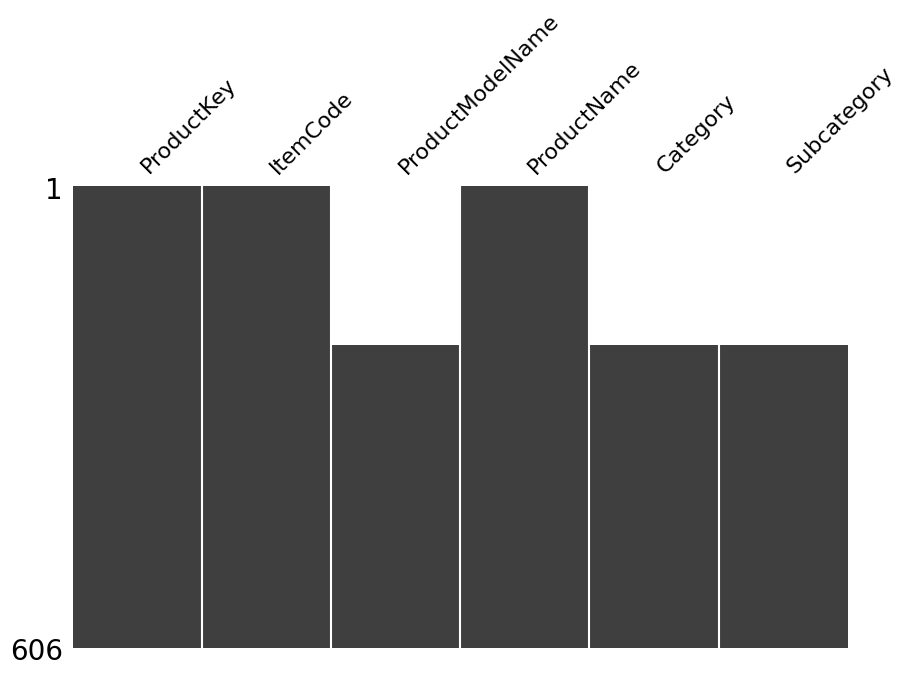

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed
msno.matrix(DimProduct, ax=ax)
plt.show()

In [ ]:
# Select rows where Category is null
null_category_products = DimProduct[DimProduct['Category'].isnull()]
null_category_products.sample(20)


,ProductKey,ItemCode,ProductModelName,ProductName,Category,Subcategory
155,156,MB-2024,NaN,Metal Bar 1,NaN,NaN
88,89,LE-7160,NaN,External Lock Washer 8,NaN,NaN
71,72,HN-7161,NaN,Hex Nut 14,NaN,NaN
139,140,LR-2398,NaN,Lock Ring,NaN,NaN
65,66,HN-5161,NaN,Hex Nut 10,NaN,NaN
160,161,MS-0253,NaN,Metal Sheet 2,NaN,NaN
179,180,RM-M464,NaN,LL Mountain Rim,NaN,NaN
200,201,SL-0931,NaN,Seat Lug,NaN,NaN
164,165,MS-2341,NaN,Metal Sheet 5,NaN,NaN
161,162,MS-1256,NaN,Metal Sheet 3,NaN,NaN


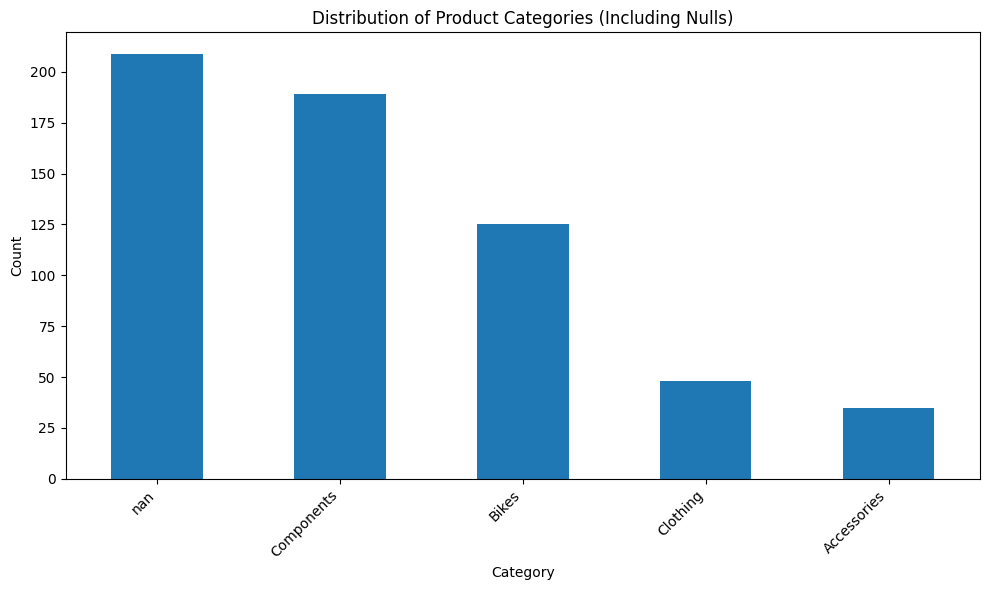

In [ ]:
# Create histogram including nulls
plt.figure(figsize=(10, 6))
DimProduct['Category'].value_counts(dropna=False).plot(kind='bar')
plt.title('Distribution of Product Categories (Including Nulls)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


well... we are bringing product to join it with FactSales, so if when merging we don't have nulls then we don't need to worry about those nulls. <br>
Those nulls were there in the database too so this was not a problem when exporting data. <br>
We should report this to the data engineers or database administrator so they can look further into it.

In [ ]:
# Merge FactSales and DimProduct on ProductKey
merged_df = pd.merge(FactSales, DimProduct, on='ProductKey', how='left')
merged_df.head()


,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount,UnitPrice,SalesReasonReasonType,ItemCode,ProductModelName,ProductName,Category,Subcategory
0,369,20230101,15116,SO46702,2443.3500,2443.3500,Promotion,BK-R89R-48,Road-250,"Road-250 Red, 48",Bikes,Road Bikes
1,370,20230101,13059,SO46704,2443.3500,2443.3500,Promotion,BK-R89R-52,Road-250,"Road-250 Red, 52",Bikes,Road Bikes
2,370,20230101,13085,SO46705,2443.3500,2443.3500,Promotion,BK-R89R-52,Road-250,"Road-250 Red, 52",Bikes,Road Bikes
3,352,20230101,20186,SO46706,2071.4196,2071.4196,Other,BK-M68S-38,Mountain-200,"Mountain-200 Silver, 38",Bikes,Mountain Bikes
4,369,20230102,13592,SO46711,2443.3500,2443.3500,Promotion,BK-R89R-48,Road-250,"Road-250 Red, 48",Bikes,Road Bikes


In [ ]:
merged_df.isna().sum()

,0
ProductKey,0
OrderDateKey,0
CustomerKey,0
SalesOrderNumber,0
SalesAmount,0
UnitPrice,0
SalesReasonReasonType,0
ItemCode,0
ProductModelName,0
ProductName,0


No nulls! this is good news

In [ ]:
merged_df['Category'].value_counts()

,count
Category,
Accessories,119604
Bikes,31335
Clothing,28192


In [ ]:
merged_df['Subcategory'].value_counts()

,count
Subcategory,
Tires and Tubes,54306
Bottles and Cages,32313
Helmets,18297
Mountain Bikes,12978
Road Bikes,12480
Jerseys,10176
Caps,7621
Fenders,7424
Touring Bikes,5877


Distributions seem fine, in this case, we'll leave the nulls in DimProduct as they are and we'll report to the team so they can dive deeper into it.

### Irrelevant columns

#### DimCustomer irrelevant columns cleaning

In [ ]:
DimCustomer.head()

,CustomerKey,GeographyKey,CustomerCity,CustomerCountry,FullName,BirthDate,MaritalStatus,Contact,Gender,YearlyIncome,TotalChildren,EnglishEducation
0,11000,26,Rockhampton,Australia,Jon Yang,10/6/1971,Married,jon24@adventure-works.com,Male,90000,2,Bachelors
1,11001,37,Seaford,Australia,Eugene Huang,5/10/1976,Single,eugene10@adventure-works.com,Male,60000,3,Bachelors
2,11002,31,Hobart,Australia,Ruben Torres,2/9/1971,Married,ruben35@adventure-works.com,Male,60000,3,Bachelors
3,11003,11,North Ryde,Australia,Christy Zhu,8/14/1973,Single,christy12@adventure-works.com,Female,70000,0,Bachelors
4,11004,19,Wollongong,Australia,Elizabeth Johnson,8/5/1979,Single,elizabeth5@adventure-works.com,Female,80000,5,Bachelors


In [ ]:
#List with caegorical column names from DimCustomer
cat_cols = ['CustomerCity','CustomerCountry','FullName','MaritalStatus','Gender','TotalChildren','EnglishEducation']

In [ ]:
#Bucle to check how many unique values are there in each column
for col in cat_cols:
  print(f'Column {col}: {DimCustomer[col].nunique()} different values')

Column CustomerCity: 269 different values
Column CustomerCountry: 6 different values
Column FullName: 18400 different values
Column MaritalStatus: 2 different values
Column Gender: 2 different values
Column TotalChildren: 6 different values
Column EnglishEducation: 5 different values


If we had just 1 unique value in any column, we should get rid of it. Because if all rows are the same, then we can't make decisions based on that data, it doesn't provide any special value. <br>
In this case, we'll keep the columns because all of them have at least 2 different values.

#### DimDate irrelevant columns cleaning

In [ ]:
DimDate.head()

,DateKey,Date,WeekNum,Day,Month,MonthShort,MonthNo,Quarter,Year
0,20230101,1/1/2023,1,Sunday,January,Jan,1,1,2023
1,20230102,1/2/2023,1,Monday,January,Jan,1,1,2023
2,20230103,1/3/2023,1,Tuesday,January,Jan,1,1,2023
3,20230104,1/4/2023,1,Wednesday,January,Jan,1,1,2023
4,20230105,1/5/2023,1,Thursday,January,Jan,1,1,2023


In [ ]:
#List with caegorical column names from DimProduct
cat_cols = ['Date','WeekNum','Day','Month','MonthShort','MonthNo', 'Quarter', 'Year']

In [ ]:
#Bucle to check how many unique values are there in each column
for col in cat_cols:
  print(f'Column {col}: {DimDate[col].nunique()} different values')

Column Date: 731 different values
Column WeekNum: 53 different values
Column Day: 7 different values
Column Month: 12 different values
Column MonthShort: 12 different values
Column MonthNo: 12 different values
Column Quarter: 4 different values
Column Year: 2 different values


Again... all of them have at least 2 different values so we'll keep every column

#### DimProduct irrelevant columns cleaning

In [ ]:
DimProduct.head()

,ProductKey,ItemCode,ProductModelName,ProductName,Category,Subcategory
0,1,AR-5381,NaN,Adjustable Race,NaN,NaN
1,2,BA-8327,NaN,Bearing Ball,NaN,NaN
2,3,BE-2349,NaN,BB Ball Bearing,NaN,NaN
3,4,BE-2908,NaN,Headset Ball Bearings,NaN,NaN
4,5,BL-2036,NaN,Blade,NaN,NaN


In [ ]:
#List with caegorical column names from DimProduct
cat_cols = ['ItemCode','ProductModelName','ProductName','Category','Subcategory']

In [ ]:
#Bucle to check how many unique values are there in each column
for col in cat_cols:
  print(f'Column {col}: {DimProduct[col].nunique()} different values')

Column ItemCode: 504 different values
Column ProductModelName: 119 different values
Column ProductName: 504 different values
Column Category: 4 different values
Column Subcategory: 37 different values


Looks good. Let's go to the next one

#### FactSales irrelevant columns cleaning

In [ ]:
FactSales.head()

,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount,UnitPrice,SalesReasonReasonType
2,369,20230101,15116,SO46702,2443.3500,2443.3500,Promotion
3,370,20230101,13059,SO46704,2443.3500,2443.3500,Promotion
7,370,20230101,13085,SO46705,2443.3500,2443.3500,Promotion
8,352,20230101,20186,SO46706,2071.4196,2071.4196,Other
14,369,20230102,13592,SO46711,2443.3500,2443.3500,Promotion


In [ ]:
#List with caegorical column names from FactSales
cat_cols = ['ProductKey','OrderDateKey','CustomerKey','SalesOrderNumber','SalesReasonReasonType']

In [ ]:
#Bucle to check how many unique values are there in each column
for col in cat_cols:
  print(f'Column {col}: {FactSales[col].nunique()} different values')

Column ProductKey: 111 different values
Column OrderDateKey: 719 different values
Column CustomerKey: 16077 different values
Column SalesOrderNumber: 20602 different values
Column SalesReasonReasonType: 3 different values


Alr, all of our tables have relevant columns.

### Typography mistakes

#### Typography mistakes in DimCustomer

In [ ]:
#This are the cat columns for DimCustomer
cat_cols = ['CustomerCity','CustomerCountry','FullName','MaritalStatus','Gender','TotalChildren','EnglishEducation']

#However, we are going to plot them, so we can't have columns with a ton of different values, we'll filter out:
#CustomerCity and FullName
#There is no way we can analyze those in detail in graph
cat_cols = ['CustomerCountry','MaritalStatus','Gender','TotalChildren','EnglishEducation']

<ipython-input-38-a6c7b6217144>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
<ipython-input-38-a6c7b6217144>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
<ipython-input-38-a6c7b6217144>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
<ipython-input-38-a6c7b6217144>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
<ipython-input-38-a6c7b6217144>:8: UserWarning: set_ticklabels() should only be used with a fixed nu

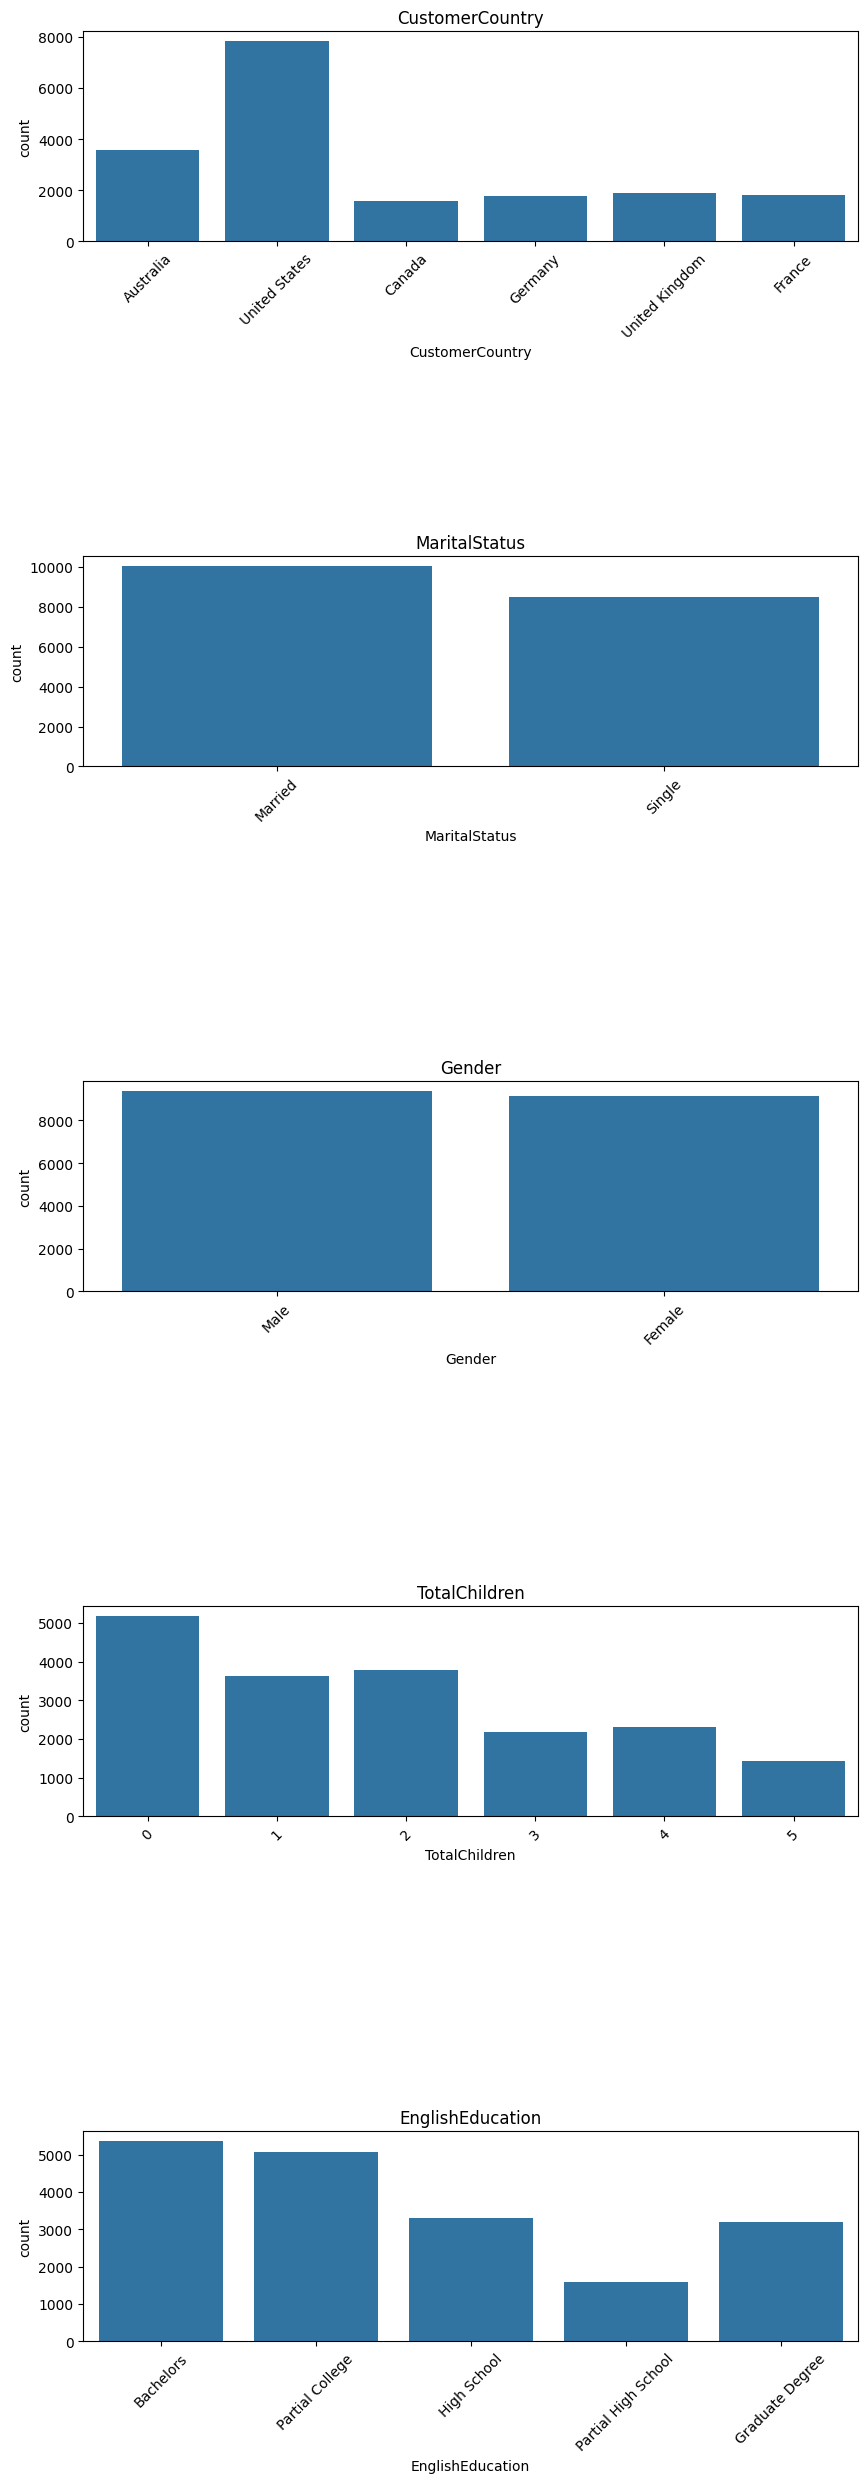

In [ ]:
#Countplot to visualize
fig, ax = plt.subplots (nrows=5, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1.5)

for i,col in enumerate(cat_cols):
    sns.countplot (x=col, data=DimCustomer, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

Alr... Looks like all values are correctly inputed.
We were looking for values that mean the same but have different format such as:<br>
"College" and "college"<br>
Those 2 mean the same but due to small mistakes like capitalization they could be treated as different values, that's what we were looking for, however, luckily our DimCustomer table has all values correctly formated.

#### Typography mistakes in DimDate

In [ ]:
#Cat columns from DimDate
cat_cols = ['Date','WeekNum','Day','Month','MonthShort','MonthNo', 'Quarter', 'Year']

#Filter out columns with too many unique values
cat_cols = ['WeekNum','Day','Month','MonthShort','MonthNo', 'Quarter', 'Year'] #Removed Date

In [ ]:
#Countplot to visualize
fig, ax = plt.subplots (nrows=len(cat_cols), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1.5)

for i,col in enumerate(cat_cols):
    sns.countplot (x=col, data=DimDate, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

Alr... For this table, columns do have the correct format. Very nice :)

#### Typography mistakes in DimProduct

In [ ]:
#List with caegorical column names from DimProduct
cat_cols = ['ItemCode','ProductModelName','ProductName','Category','Subcategory']

#Filter out columns with too many unique values
cat_cols = ['Category','Subcategory'] #Removed ItemCode, ProductModelName, ProductModelName

<ipython-input-61-a5a9d80a9071>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
<ipython-input-61-a5a9d80a9071>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)


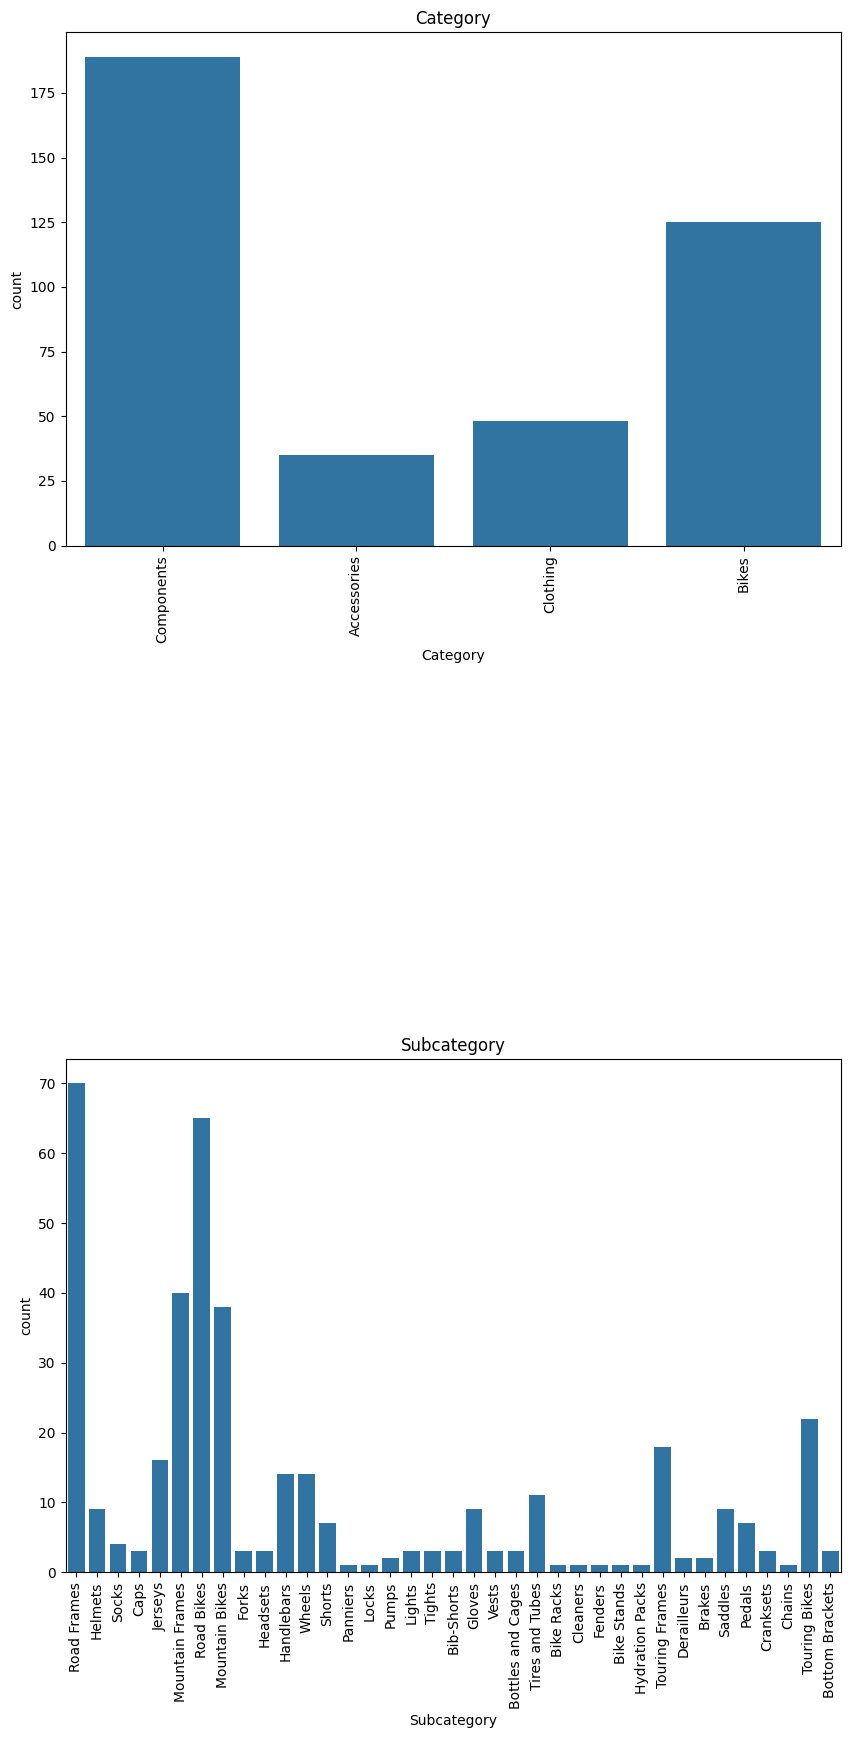

In [ ]:
#Countplot to visualize
fig, ax = plt.subplots (nrows=len(cat_cols), ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace=1)

for i,col in enumerate(cat_cols):
    sns.countplot (x=col, data=DimProduct, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

#### Typography mistakes in FactSales

In [ ]:
#List with caegorical column names from FactSales
cat_cols = ['ProductKey','OrderDateKey','CustomerKey','SalesOrderNumber','SalesReasonReasonType']
#We can only really analyze SalesReasonReasonType HAHA
cat_cols = ['SalesReasonReasonType']

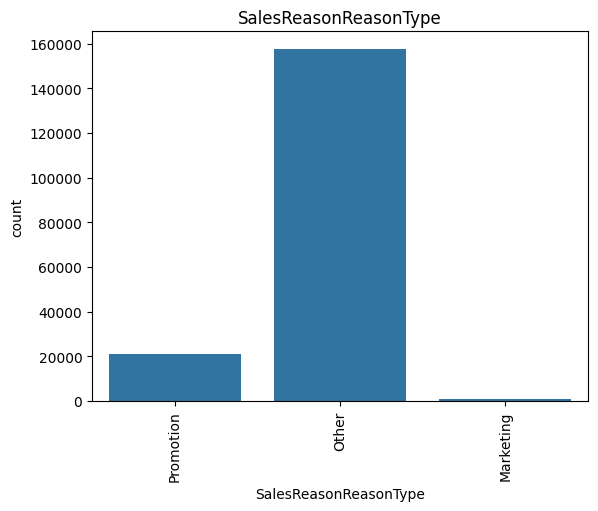

In [ ]:
fig, ax = plt.subplots()  # Create figure and axis
sns.countplot(x='SalesReasonReasonType', data=FactSales, ax=ax) #Create countplot

ax.set_title('SalesReasonReasonType')
ax.tick_params(axis='x', rotation=90)  # Rotate labels properly

plt.show()

Data looks very skew towards "Other" value, there are too many records with that value and very few with "Marketing" <br>
Maybe this column won't be very informative but I feel like it's too soon to tell yet. So let's keep it and analyze it deeper futher down the line to determine whether it's useful or not.

### Duplicated Rows

In [ ]:
DimCustomer.duplicated().value_counts() #Check for duplicated rows in DimCustomer

,count
False,18484


In [ ]:
DimDate.duplicated().value_counts() #Check for duplicated rows in DimCustomer

,count
False,731


In [ ]:
DimProduct.duplicated().value_counts() #Check for duplicated rows in DimCustomer

,count
False,606


In [ ]:
FactSales.duplicated().value_counts() #Check for duplicated rows in DimCustomer

,count
True,123198
False,55933


WHAT!!!???
123K DUPLICATED ROWS!!!

Alr... let's analyze this further

In [ ]:
FactSales

,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount,UnitPrice,SalesReasonReasonType
2,369,20230101,15116,SO46702,2443.3500,2443.3500,Promotion
3,370,20230101,13059,SO46704,2443.3500,2443.3500,Promotion
7,370,20230101,13085,SO46705,2443.3500,2443.3500,Promotion
8,352,20230101,20186,SO46706,2071.4196,2071.4196,Other
14,369,20230102,13592,SO46711,2443.3500,2443.3500,Promotion
...,...,...,...,...,...,...,...
184850,222,20241231,15444,SO74237,34.9900,34.9900,Other
184851,225,20241231,15444,SO74237,8.9900,8.9900,Other
184852,225,20241231,15444,SO74237,8.9900,8.9900,Other
184853,225,20241231,15444,SO74237,8.9900,8.9900,Other


In [ ]:
FactSales['SalesOrderNumber'].value_counts()

,count
SalesOrderNumber,
SO58845,128
SO63100,108
SO64542,98
SO71961,98
SO60233,98
...,...
SO68779,1
SO68765,1
SO56824,1


In [ ]:
# Display duplicated rows in FactSales
duplicated_sales = FactSales[FactSales.duplicated(keep=False)]
duplicated_sales.head(50)


,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount,UnitPrice,SalesReasonReasonType
3201,372,20231228,12132,SO51181,2443.35,2443.35,Other
3202,372,20231228,12132,SO51181,2443.35,2443.35,Other
3203,372,20231228,12132,SO51181,2443.35,2443.35,Other
3204,372,20231228,12132,SO51181,2443.35,2443.35,Other
3205,529,20231228,12132,SO51181,3.99,3.99,Other
3206,529,20231228,12132,SO51181,3.99,3.99,Other
3207,529,20231228,12132,SO51181,3.99,3.99,Other
3208,529,20231228,12132,SO51181,3.99,3.99,Other
3209,540,20231228,12132,SO51181,32.60,32.60,Other
3210,540,20231228,12132,SO51181,32.60,32.60,Other


In [ ]:
# Analyze duplicated SalesOrderNumber values
sales_order_counts = FactSales['SalesOrderNumber'].value_counts()
sales_order_counts

,count
SalesOrderNumber,
SO58845,128
SO63100,108
SO64542,98
SO71961,98
SO60233,98
...,...
SO68779,1
SO68765,1
SO56824,1


In [ ]:
# Example: Investigate a specific SalesOrderNumber with multiple entries
example_order = sales_order_counts.index[2]  # Get the SalesOrderNumber with the highest count
example_rows = FactSales[FactSales['SalesOrderNumber'] == example_order]
example_rows

,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount,UnitPrice,SalesReasonReasonType
107436,528,20240819,17221,SO64542,4.99,4.99,Other
107437,485,20240819,17221,SO64542,21.98,21.98,Other
107438,478,20240819,17221,SO64542,9.99,9.99,Other
107439,477,20240819,17221,SO64542,4.99,4.99,Other
107440,214,20240819,17221,SO64542,34.99,34.99,Other
...,...,...,...,...,...,...,...
107529,478,20240819,17221,SO64542,9.99,9.99,Promotion
107530,477,20240819,17221,SO64542,4.99,4.99,Promotion
107531,214,20240819,17221,SO64542,34.99,34.99,Promotion
107532,359,20240819,17221,SO64542,2294.99,2294.99,Promotion


In [ ]:
emp = FactSales.drop_duplicates()

In [ ]:
emp.duplicated().value_counts()

,count
False,55933


In [ ]:
emp['SalesReasonReasonType'].value_counts()

,count
SalesReasonReasonType,
Other,47874
Promotion,7381
Marketing,678


After dropping duplicates, we'll be left with 55k rows.

However, I think we sould not drop this duplicates, these aren't exact duplicates, they just belong to the same order.

### Remove Outliers

#### DimCustomer

In [ ]:
DimCustomer.head()

,CustomerKey,GeographyKey,CustomerCity,CustomerCountry,FullName,BirthDate,MaritalStatus,Contact,Gender,YearlyIncome,TotalChildren,EnglishEducation
0,11000,26,Rockhampton,Australia,Jon Yang,10/6/1971,Married,jon24@adventure-works.com,Male,90000,2,Bachelors
1,11001,37,Seaford,Australia,Eugene Huang,5/10/1976,Single,eugene10@adventure-works.com,Male,60000,3,Bachelors
2,11002,31,Hobart,Australia,Ruben Torres,2/9/1971,Married,ruben35@adventure-works.com,Male,60000,3,Bachelors
3,11003,11,North Ryde,Australia,Christy Zhu,8/14/1973,Single,christy12@adventure-works.com,Female,70000,0,Bachelors
4,11004,19,Wollongong,Australia,Elizabeth Johnson,8/5/1979,Single,elizabeth5@adventure-works.com,Female,80000,5,Bachelors


<Axes: xlabel='YearlyIncome'>

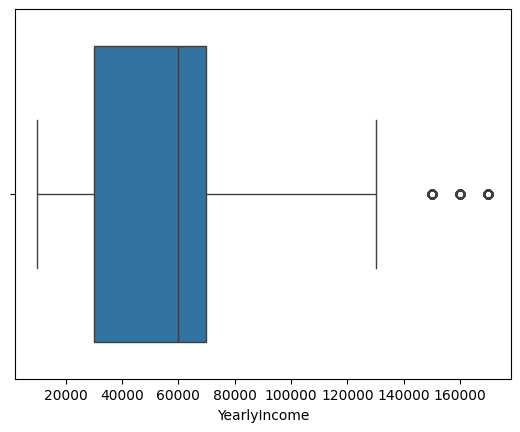

In [ ]:
#There is only 1 numerical variable
sns.boxplot(x='YearlyIncome', data=DimCustomer)

We have 3 outliers, but in salary is very common to get outliers because of capitalism. <br>
So... let's keep them.

#### DimDate

In [ ]:
DimDate.head()

,DateKey,Date,WeekNum,Day,Month,MonthShort,MonthNo,Quarter,Year
0,20230101,1/1/2023,1,Sunday,January,Jan,1,1,2023
1,20230102,1/2/2023,1,Monday,January,Jan,1,1,2023
2,20230103,1/3/2023,1,Tuesday,January,Jan,1,1,2023
3,20230104,1/4/2023,1,Wednesday,January,Jan,1,1,2023
4,20230105,1/5/2023,1,Thursday,January,Jan,1,1,2023


We don't have numerical columns, only year but we already verified we only have 2023 and 2024 earlier.

#### DimProduct

In [ ]:
DimProduct.head()

,ProductKey,ItemCode,ProductModelName,ProductName,Category,Subcategory
0,1,AR-5381,NaN,Adjustable Race,NaN,NaN
1,2,BA-8327,NaN,Bearing Ball,NaN,NaN
2,3,BE-2349,NaN,BB Ball Bearing,NaN,NaN
3,4,BE-2908,NaN,Headset Ball Bearings,NaN,NaN
4,5,BL-2036,NaN,Blade,NaN,NaN


We don't have numerical columns either

#### FactSales

In [ ]:
FactSales.head()

,ProductKey,OrderDateKey,CustomerKey,SalesOrderNumber,SalesAmount,UnitPrice,SalesReasonReasonType
2,369,20230101,15116,SO46702,2443.3500,2443.3500,Promotion
3,370,20230101,13059,SO46704,2443.3500,2443.3500,Promotion
7,370,20230101,13085,SO46705,2443.3500,2443.3500,Promotion
8,352,20230101,20186,SO46706,2071.4196,2071.4196,Other
14,369,20230102,13592,SO46711,2443.3500,2443.3500,Promotion


In [ ]:
var_num = ['SalesAmount', 'UnitPrice']

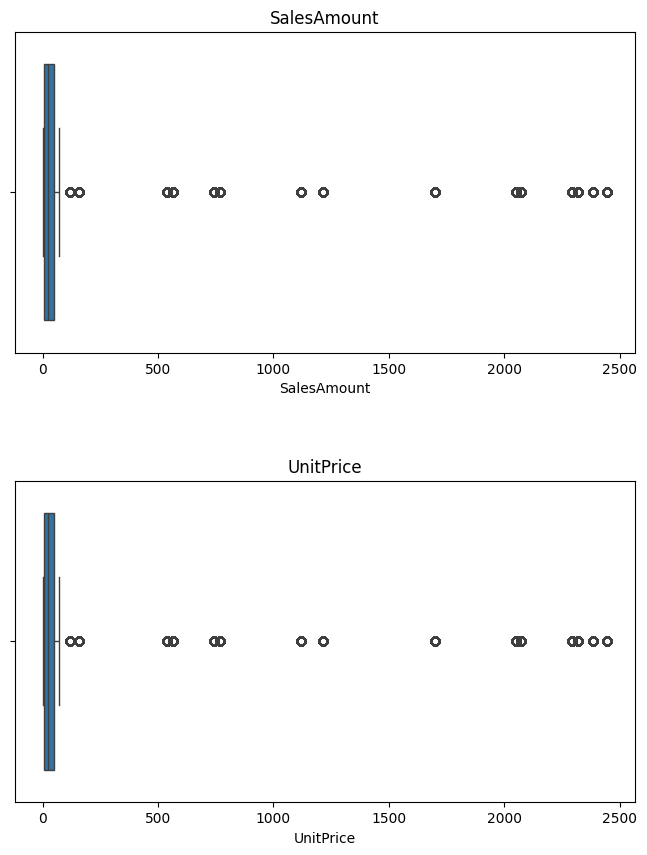

In [ ]:
fig, ax = plt.subplots (nrows=len(var_num), ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.4)

for i,col in enumerate(var_num):
    sns.boxplot(x=col, data=FactSales, ax=ax[i])
    ax[i].set_title(col)

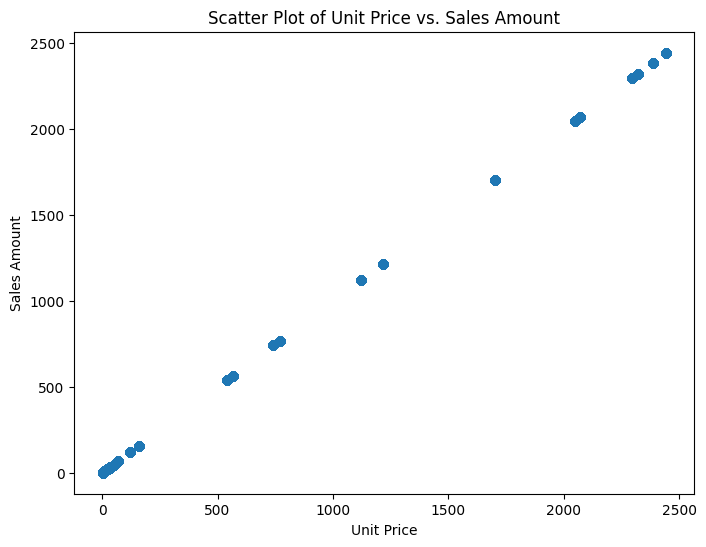

In [ ]:
#Scater plot unitprice in x axis and salesamount in y axis
plt.figure(figsize=(8, 6))
plt.scatter(FactSales['UnitPrice'], FactSales['SalesAmount'])
plt.xlabel('Unit Price')
plt.ylabel('Sales Amount')
plt.title('Scatter Plot of Unit Price vs. Sales Amount')
plt.show()

Uhm, There are way too weirdly correlated

In [ ]:
#Let's select samples from both columns to verify if they're the same
FactSales[['UnitPrice', 'SalesAmount']].sample(10)

,UnitPrice,SalesAmount
37004,2.29,2.29
36570,54.99,54.99
74313,34.99,34.99
151565,159.00,159.00
74018,1120.49,1120.49
14797,34.99,34.99
165543,32.60,32.60
6779,539.99,539.99
172442,28.99,28.99
122963,539.99,539.99


Well... THEY ARE EXACTLY THE SAME.
Let's drop one and inform our manager so the database administrator can correct this.

In [ ]:
#Drop UnitPrice from FactSales because it has the same values as SalesAmount
FactSales.drop(columns='UnitPrice', inplace=True)

### Export DF

In [ ]:
DimCustomer.to_csv('DimCustomer_Clean.csv', index=False)

In [ ]:
DimDate.to_csv('DimDate_Clean.csv', index=False)

In [ ]:
DimProduct.to_csv('DimProduct_Clean.csv', index=False)

In [ ]:
FactSales.to_csv('FactSales_Clean.csv', index=False)